In [105]:
import pandas as pd
import numpy as np
import yfinance as yf
from pylab import mpl, plt
import scienceplots

In [88]:
dataset  = yf.download(['FCX','HG=F'])


dataset_FCX = pd.DataFrame()

dataset_FCX['price'] = dataset['Adj Close']['FCX']


[*********************100%***********************]  2 of 2 completed


In [89]:
dataset_FCX['SMA1'] = dataset_FCX['price'].rolling(40).mean()
dataset_FCX['SMA2'] = dataset_FCX['price'].rolling(250).mean()


<AxesSubplot:title={'center':'FCX | 40 & 250 days SMAs'}, xlabel='Date'>

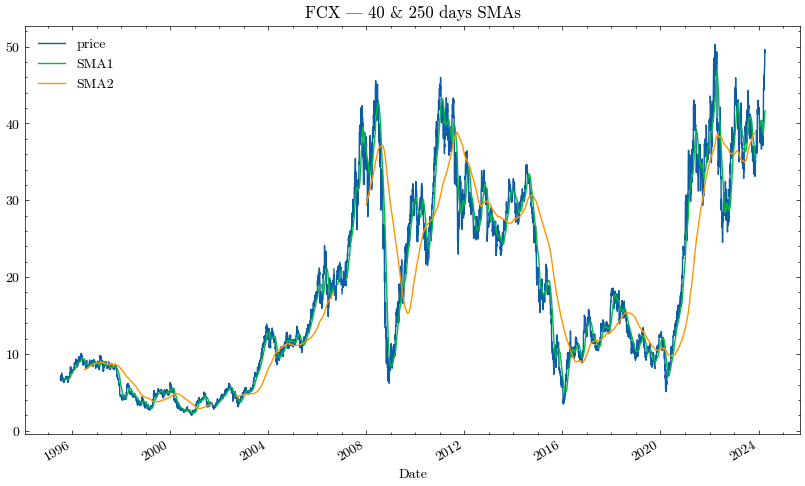

In [90]:
plt.style.use(['science','no-latex'])

dataset_FCX.plot(title='FCX | 40 & 250 days SMAs',figsize=(10,6))

<AxesSubplot:title={'center':'Market Positioning'}, xlabel='Date'>

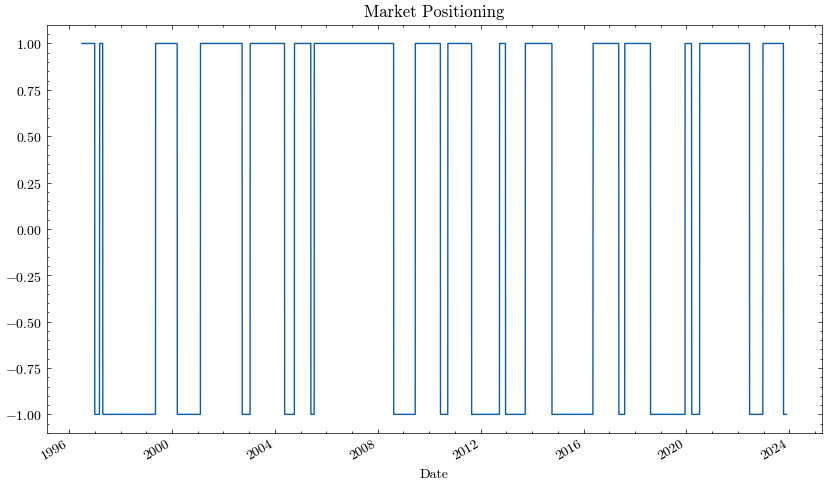

In [91]:
dataset_FCX['position'] = np.where(dataset_FCX['SMA1']>dataset_FCX['SMA2'],1,-1)
dataset_FCX = dataset_FCX.dropna()
dataset_FCX['position'].plot(ylim = [-1.1,1.1],title='Market Positioning',figsize=(10,6))


<AxesSubplot:>

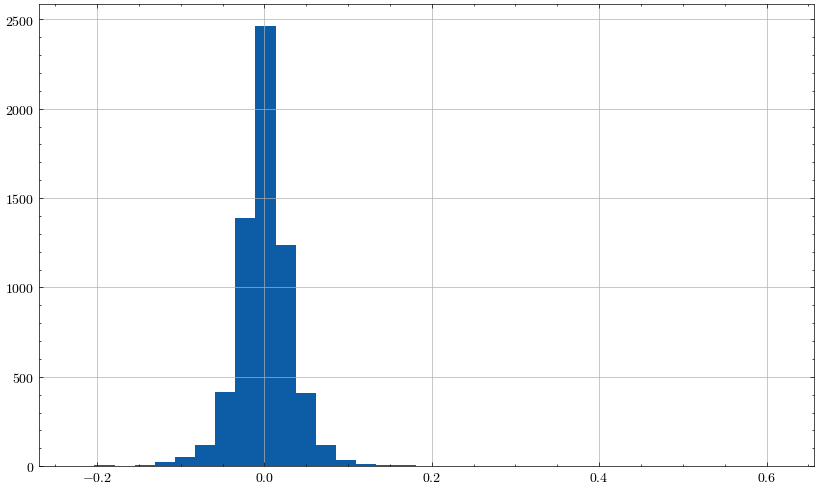

In [92]:
dataset_FCX['returns'] = np.log(dataset_FCX['price']/dataset_FCX['price'].shift(1))
dataset_FCX['returns'].hist(bins=35,figsize=(10,6))

In [93]:
dataset_FCX['strategy'] = dataset_FCX['position'].shift(1) * dataset_FCX['returns']
dataset_FCX[['returns','strategy']].sum()

returns     1.403773
strategy    1.770351
dtype: float64

In [94]:
#Gross performance
dataset_FCX[['returns','strategy']].sum().apply(np.exp)

returns     4.070530
strategy    5.872916
dtype: float64

<AxesSubplot:xlabel='Date'>

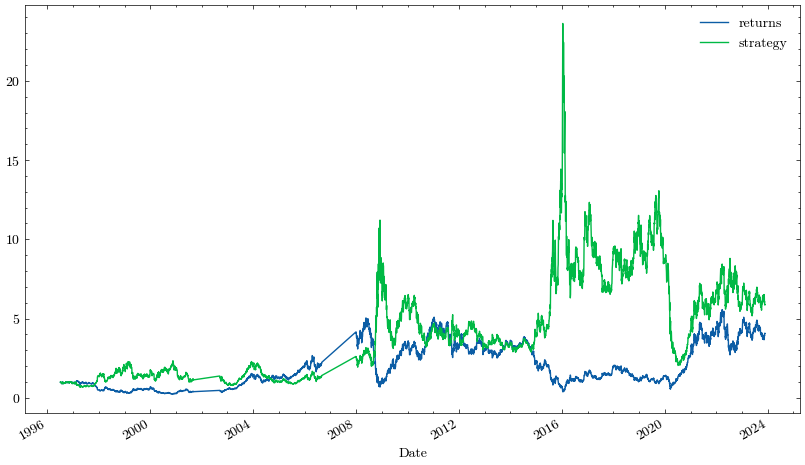

In [95]:
#Cumulative return over time
dataset_FCX[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [96]:
#Calculates the annualized mean return in both log and regular space.
dataset_FCX[['returns','strategy']].mean() *252

returns     0.056018
strategy    0.070646
dtype: float64

In [97]:
np.exp(dataset_FCX[['returns','strategy']].mean() *252) -1

returns     0.057616
strategy    0.073201
dtype: float64

In [98]:
#Calculates the annualized standard deviation in both log and regular space.
dataset_FCX[['returns','strategy']].std() *252 ** 0.5

returns     0.534210
strategy    0.534203
dtype: float64

In [99]:
(dataset_FCX[['returns','strategy']].apply(np.exp) -1 ).std() * 252 ** 0.5

returns     0.547602
strategy    0.546807
dtype: float64

<AxesSubplot:xlabel='Date'>

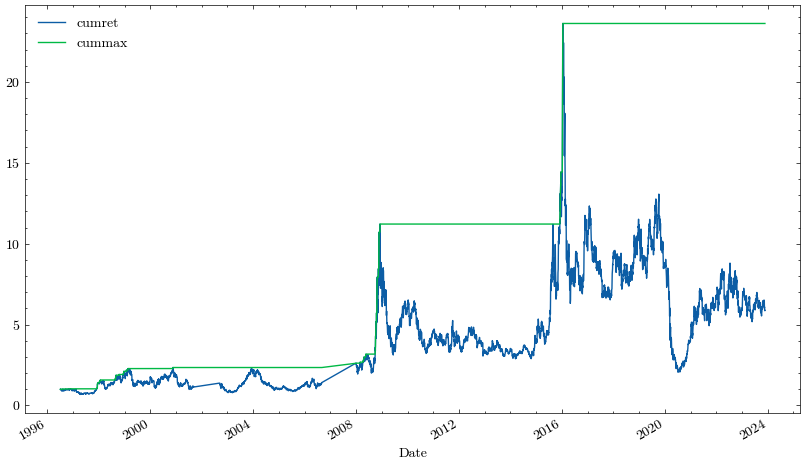

In [100]:
dataset_FCX['cumret']  = dataset_FCX['strategy'].cumsum().apply(np.exp)
dataset_FCX['cummax'] = dataset_FCX['cumret'].cummax()
dataset_FCX[['cumret','cummax']].dropna().plot(figsize=(10,6))

In [101]:
drawdown = dataset_FCX['cummax'] - dataset_FCX['cumret']
drawdown.max()

21.569383285879884

In [104]:
arr_date = dataset_FCX.index.to_pydatetime()
dataset_FCX.index  = pd.Series(arr_date,dtype=object)

temp = drawdown[drawdown == 0]
periods = (temp.index[1:] - temp.index[:-1])
periods.max()

Timedelta('2597 days 00:00:00')